# SETUP

In [1]:
from typing import List
import unicodedata
import re

import nltk
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# matplotlib default plotting styles
plt.rc("patch", edgecolor="black", force_edgecolor=True)
plt.rc("axes", grid=True)
plt.rc("grid", linestyle=":", linewidth=0.8, alpha=0.7)
plt.rc("axes.spines", right=False, top=False)
plt.rc("figure", figsize=(11, 8))
plt.rc("font", size=12.0)
plt.rc("hist", bins=25)

def clean(text: str) -> List[str]:
    "a simple function to prepare text data"
    wnl = nltk.stem.WordNetLemmatizer()
    stopwords = nltk.corpus.stopwords.words("english") + ["r", "u", "2", "ltgt"]
    text = (
        unicodedata.normalize("NFKD", text)
        .encode("ascii", "ignore")
        .decode("utf-8", "ignore")
        .lower()
    )
    words = re.sub(r"[^\w\s]", "", text).split()
    return [wnl.lemmatize(word) for word in words if word not in stopwords]

df = pd.read_csv("spam_clean.csv")

In [2]:
df.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [3]:
df.shape

(5572, 2)

In [4]:
df.isnull().sum()

label    0
text     0
dtype: int64

In [5]:
df.text

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
5       FreeMsg Hey there darling it's been 3 week's n...
6       Even my brother is not like to speak with me. ...
7       As per your request 'Melle Melle (Oru Minnamin...
8       WINNER!! As a valued network customer you have...
9       Had your mobile 11 months or more? U R entitle...
10      I'm gonna be home soon and i don't want to tal...
11      SIX chances to win CASH! From 100 to 20,000 po...
12      URGENT! You have won a 1 week FREE membership ...
13      I've been searching for the right words to tha...
14                    I HAVE A DATE ON SUNDAY WITH WILL!!
15      XXXMobileMovieClub: To use your credit, click ...
16                             Oh k...i'm watching here:)
17      Eh u r

## Percentage of spam in all data

,n,percent
ham,4825,0.865937
spam,747,0.134063


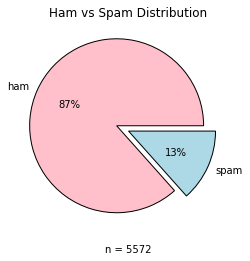

In [6]:
df.label.value_counts().plot.pie(
    colors=["pink", "lightblue"], explode=(0.15, 0), autopct="%.0f%%"
)
plt.title("Ham vs Spam Distribution")
plt.ylabel("")
plt.xlabel("n = %d" % df.shape[0])

pd.concat(
    [df.label.value_counts(), df.label.value_counts(normalize=True)], axis=1
).set_axis(["n", "percent"], axis=1, inplace=False)

## Term Frequency

In [7]:
pd.Series(" ".join(df.text).split()).value_counts()

to                   2134
you                  1622
I                    1466
a                    1327
the                  1197
and                   857
in                    798
is                    781
i                     742
u                     692
for                   644
my                    628
of                    591
your                  560
me                    557
on                    487
have                  474
2                     453
that                  421
it                    396
are                   396
call                  376
or                    373
be                    362
at                    359
with                  349
not                   340
will                  330
get                   326
can                   304
                     ... 
Bless                   1
Tonight?                1
hopefully,              1
gals..                  1
talks                   1
reunion?                1
ripped                  1
curfew.     

- filter spam, and non-spam by masking df
- use .join() to convert qualified df.text into corresponding string

In [8]:
all_text = " ".join(df.text)
spam_text = " ".join(df[df.label == "spam"].text)
ham_text = " ".join(df[df.label == "ham"].text)

In [9]:
all_text

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat... Ok lar... Joking wif u oni... Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C\'s apply 08452810075over18\'s U dun say so early hor... U c already then say... Nah I don\'t think he goes to usf, he lives around here though FreeMsg Hey there darling it\'s been 3 week\'s now and no word back! I\'d like some fun you up for it still? Tb ok! XxX std chgs to send, å£1.50 to rcv Even my brother is not like to speak with me. They treat me like aids patent. As per your request \'Melle Melle (Oru Minnaminunginte Nurungu Vettam)\' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune WINNER!! As a valued network customer you have been selected to receivea å£900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours only. Had your mobile 11 months or more?

- Cleaning data using pre-built clean function
- end product is a list with individual words in string format

In [10]:
all_words = clean(all_text)
spam_words = clean(spam_text)
ham_words = clean(ham_text)

In [11]:
all_words

['go',
 'jurong',
 'point',
 'crazy',
 'available',
 'bugis',
 'n',
 'great',
 'world',
 'la',
 'e',
 'buffet',
 'cine',
 'got',
 'amore',
 'wat',
 'ok',
 'lar',
 'joking',
 'wif',
 'oni',
 'free',
 'entry',
 'wkly',
 'comp',
 'win',
 'fa',
 'cup',
 'final',
 'tkts',
 '21st',
 'may',
 '2005',
 'text',
 'fa',
 '87121',
 'receive',
 'entry',
 'questionstd',
 'txt',
 'ratetcs',
 'apply',
 '08452810075over18s',
 'dun',
 'say',
 'early',
 'hor',
 'c',
 'already',
 'say',
 'nah',
 'dont',
 'think',
 'go',
 'usf',
 'life',
 'around',
 'though',
 'freemsg',
 'hey',
 'darling',
 '3',
 'week',
 'word',
 'back',
 'id',
 'like',
 'fun',
 'still',
 'tb',
 'ok',
 'xxx',
 'std',
 'chgs',
 'send',
 'a150',
 'rcv',
 'even',
 'brother',
 'like',
 'speak',
 'treat',
 'like',
 'aid',
 'patent',
 'per',
 'request',
 'melle',
 'melle',
 'oru',
 'minnaminunginte',
 'nurungu',
 'vettam',
 'set',
 'callertune',
 'caller',
 'press',
 '9',
 'copy',
 'friend',
 'callertune',
 'winner',
 'valued',
 'network',
 'cu

Count frequency of words in different subset of data

In [12]:
all_freq = pd.Series(all_words).value_counts()
spam_freq = pd.Series(spam_words).value_counts()
ham_freq = pd.Series(ham_words).value_counts()

In [13]:
all_freq

call           600
im             462
get            397
ur             384
go             304
4              287
dont           279
ok             277
free           275
know           267
come           247
like           245
day            241
got            238
ill            237
good           235
time           232
text           214
want           213
love           203
send           190
need           182
one            180
going          171
today          169
txt            163
home           162
lor            160
see            157
sorry          156
              ... 
stated           1
dancin           1
occasion         1
anyones          1
10th             1
ovarian          1
8lovable         1
samantha         1
padhegm          1
jamz             1
joker            1
08718738034      1
watt             1
outgoing         1
evry             1
breather         1
spoil            1
get4an18th       1
077xxx           1
09099726395      1
phil             1
coughing    

In [14]:
tf = (
    pd.concat([all_freq, ham_freq, spam_freq], axis=1, sort=True)
    .rename(columns={0: "all", 1: "ham", 2: "spam"})
    .fillna(0)
    .apply(lambda col: col.astype(int))
)

Text(0.5, 1.0, '10 most common words in texts')

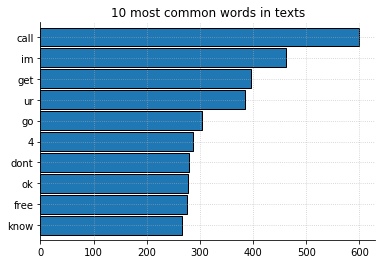

In [15]:
tf.sort_values(by='all')['all'].tail(10).plot.barh(width=.9)
plt.title('10 most common words in texts')

Text(0.5, 1.0, '10 most common words in spam texts')

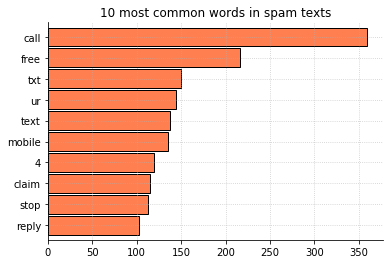

In [16]:
tf.sort_values(by='spam')['spam'].tail(10).plot.barh(width=.9, color = 'coral')
plt.title('10 most common words in spam texts')

Text(0.5, 1.0, '10 most common words in non-spam texts')

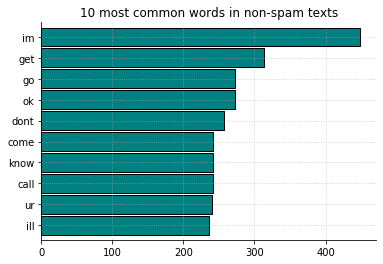

In [17]:
tf.sort_values(by = 'ham')['ham'].tail(10).plot.barh(width = .9, color = 'teal')
plt.title('10 most common words in non-spam texts')

## Ngrams
- bigrams + viz most frequent for all, spam, ham
- trigrams, etc
- a concept similar to rolling average, present n-consecutive words

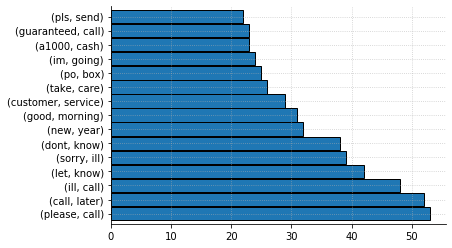

In [18]:
pd.Series(nltk.bigrams(all_words)).value_counts().head(15).plot.barh(width=.95)

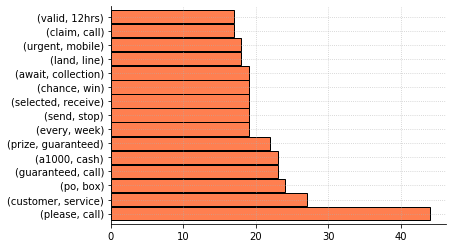

In [19]:
pd.Series(nltk.bigrams(spam_words)).value_counts().head(15).plot.barh(width = .95, color = 'coral')

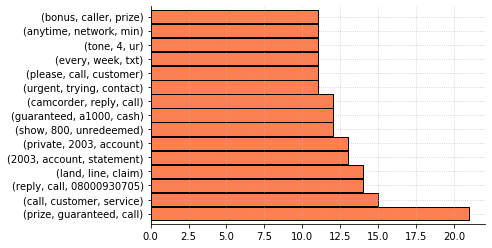

In [20]:
pd.Series(nltk.ngrams(spam_words, 3)).value_counts().head(15).plot.barh(width= .95, color='coral')

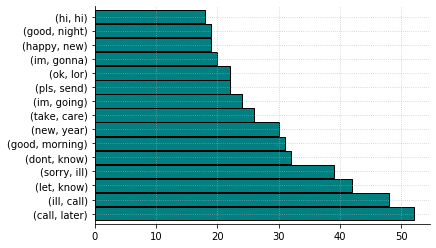

In [21]:
pd.Series(nltk.bigrams(ham_words)).value_counts().head(15).plot.barh(width = .95, color = 'teal')

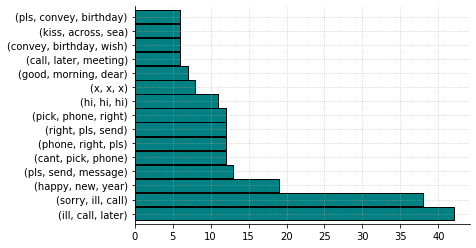

In [22]:
pd.Series(nltk.ngrams(ham_words, 3)).value_counts().head(15).plot.barh(width = .95, color = 'teal')

## Text Length

In [23]:
df["message_length"] = df.text.apply(len)

In [24]:
df.head()

,label,text,message_length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


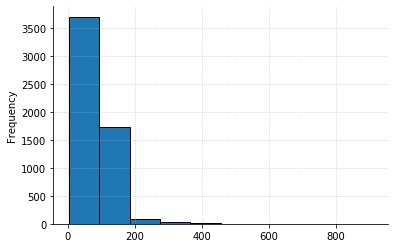

In [28]:
df.message_length.plot.hist()

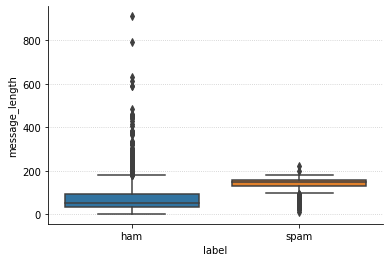

In [29]:
sns.boxplot(data=df, y="message_length", x="label")

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a233f55f8>,
      dtype=object)

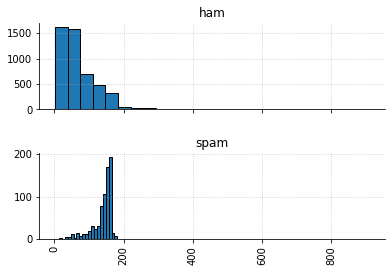

In [30]:
df.hist("message_length", by="label", sharex=True, layout=(2, 1), bins=25)

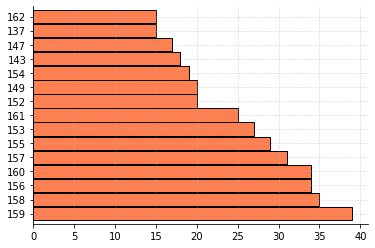

In [27]:
df[df.label == 'spam'].message_length.value_counts().head(15).plot.barh(width = .95, color = 'coral')

## Number of Words

In [31]:
df["n_words"] = df.text.str.count(r"\w+")

In [32]:
df.groupby("label").n_words.describe()

,count,mean,std,min,25%,50%,75%,max
label,,,,,,,,
ham,4825.0,14.677098,11.738398,0.0,7.0,11.0,19.0,190.0
spam,747.0,25.821954,6.073204,2.0,24.0,27.0,30.0,40.0


Text(0.5, 0.98, 'Distribution of Number of Words for Spam and Ham Messages')

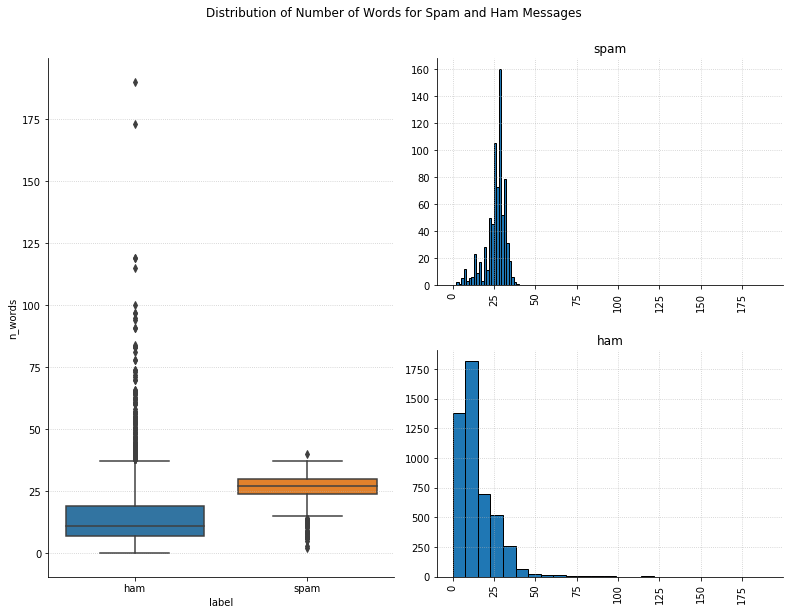

In [33]:
fig = plt.figure(figsize=(12, 9))
ax1 = fig.add_axes([0.1, 0.1, 0.4, 0.8])  # left, bottom, width, height
ax2 = fig.add_axes([0.55, 0.1, 0.4, 0.35])
ax3 = fig.add_axes([0.55, 0.55, 0.4, 0.35], sharex=ax2)
sns.boxplot(data=df, y="n_words", x="label", ax=ax1)
df.hist("n_words", by="label", bins=25, ax=[ax2, ax3])
fig.suptitle("Distribution of Number of Words for Spam and Ham Messages")

(-0.5, 1199.5, 799.5, -0.5)

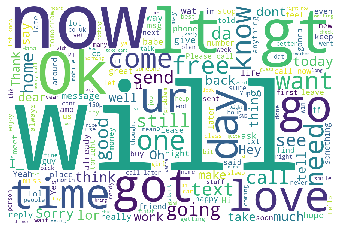

In [50]:
from wordcloud import WordCloud

# wordcloud create image object
# random_state fix the color so it won't change everytime we rerun the code
img = WordCloud(background_color="white", height=800, width=1200, random_state = 123).generate(all_text)

# if no plt.imshow(img), the image won't showup
plt.imshow(img)

# if no axis("off"), there will be auto created gridline underneath the cloud
plt.axis("off")

(-0.5, 1199.5, 799.5, -0.5)

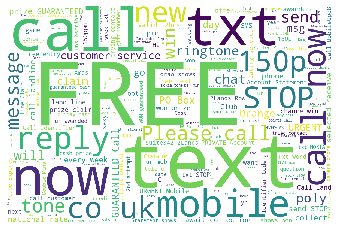

In [41]:
img = WordCloud(background_color="white", height=800, width=1200).generate(spam_text)
plt.imshow(img)
plt.axis("off")

(-0.5, 1199.5, 799.5, -0.5)

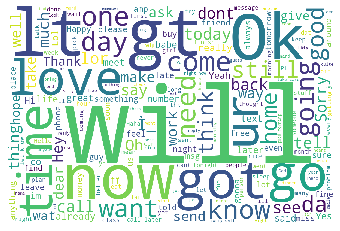

In [43]:
img = WordCloud(background_color="white", height=800, width=1200).generate(ham_text)
plt.imshow(img)
plt.axis("off")

In [45]:
top_20_ham_bigrams = pd.Series(nltk.bigrams(ham_words)).value_counts().head(20)

In [46]:
data = {p1 + " " + p2: v for (p1, p2), v in top_20_ham_bigrams.to_dict().items()}
data

{'call later': 52,
 'ill call': 48,
 'let know': 42,
 'sorry ill': 39,
 'dont know': 32,
 'good morning': 31,
 'new year': 30,
 'take care': 26,
 'im going': 24,
 'pls send': 22,
 'ok lor': 22,
 'im gonna': 20,
 'happy new': 19,
 'good night': 19,
 'hi hi': 18,
 'last night': 18,
 'wat time': 18,
 'great day': 17,
 'send message': 15,
 'nice day': 15}

(-0.5, 1599.5, 1199.5, -0.5)

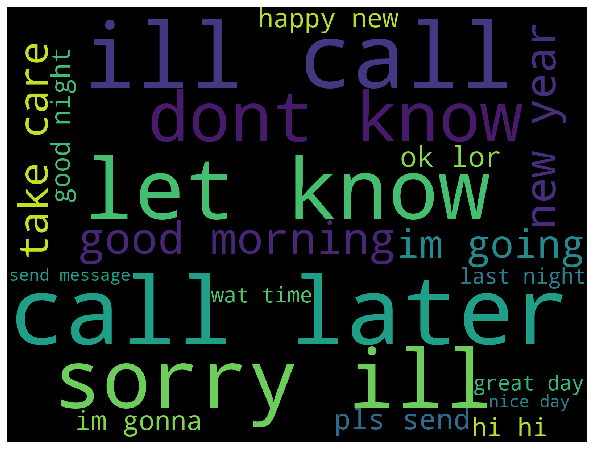

In [51]:
img = WordCloud(
    background_color="black", width=1600, height=1200
, random_state = 123).generate_from_frequencies(data)

plt.figure(figsize=(16, 8))
plt.imshow(img)
plt.axis("off")

## Sentiment analysis

Methods:
- Veder
- Afin

In [54]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sia = SentimentIntensityAnalyzer()

In [55]:
# use lambda to assign "input" string into vedar for sentiment analysis
# sia.polarity_scores(input) 
df["vader_sentiment"] = df.text.apply(lambda txt: sia.polarity_scores(txt)["compound"])

In [56]:
df.head()

,label,text,message_length,n_words,vader_sentiment
0,ham,"Go until jurong point, crazy.. Available only ...",111,20,0.6249
1,ham,Ok lar... Joking wif u oni...,29,6,0.4767
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,33,0.7964
3,ham,U dun say so early hor... U c already then say...,49,11,0.0000
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,14,-0.1027


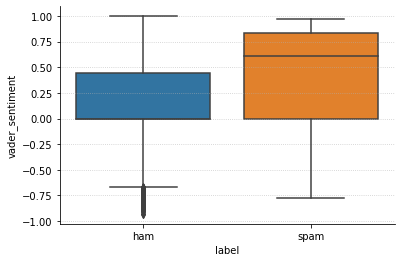

In [57]:
sns.boxplot(data=df, y="vader_sentiment", x="label")

## Afin

In [63]:
# create analysis object
from afinn import Afinn
sa = Afinn()

In [64]:
df["afinn_sentiment"] = df.text.apply(sa.score)

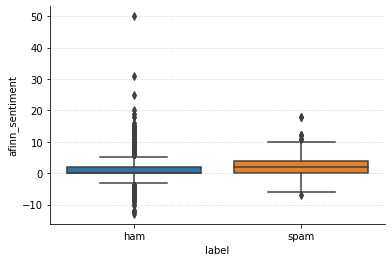

In [65]:
sns.boxplot(data=df, y="afinn_sentiment", x="label")

In [66]:
from scipy.stats import pearsonr
# is there a correlation between message length & Afinn sentiment result?
pearsonr(df.message_length, df.afinn_sentiment)

(0.25178783274393846, 2.563658698130022e-81)

In [68]:
pearsonr(df.message_length, df.vader_sentiment)

(0.23723897372311384, 3.870085434638246e-72)

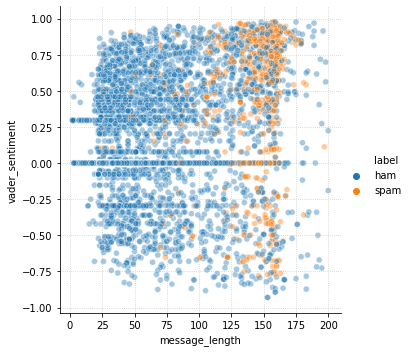

In [69]:
sns.relplot(data=df[df.message_length <= 200], y='vader_sentiment', x='message_length', hue='label', alpha=.4)